In [28]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import date
import plotly.express as px

## Parameters

In [371]:
#Creating variables to store start and end date of analysis
start_date = '2022-01-01'
end_date = date.today()

In [369]:
#We are going to store all the tickers for the companies in our investment portfolio in a variable named wallet. Later, we will iterate over this variable in order to pull our data
wallet = ['CIEL3', 'BRFS3', 'BBDC4', 'ENEV3']

## First, let's pull data for our reference index (IBOVESPA)

In [372]:
#Reading data using pandas datareader and cleaning column names
ibov = pdr.DataReader(f'^BVSP', data_source='yahoo', start=start_date, end=end_date)
ibov.reset_index(drop=False, inplace=True)
ibov = ibov[['Date', 'Close']] #we are only interested in the closing prices
ibov.rename(columns={'Date':'date', 'Close':'ibov_close'}, inplace=True)

In [373]:
#Creating the cumulative change column. This way, we can easily compare performance across multiple companies
reference = ibov.at[0,"ibov_close"]
ibov['ibov_cum_change'] = ibov['ibov_close'].apply(lambda x: (x-reference)*100/reference)
ibov

,date,ibov_close,ibov_cum_change
0,2022-01-03,103922.00000,0.000000
1,2022-01-04,103514.00000,-0.392602
2,2022-01-05,101006.00000,-2.805951
3,2022-01-06,101561.00000,-2.271896
4,2022-01-07,102719.00000,-1.157599
...,...,...,...
121,2022-06-28,100591.00000,-3.205289
122,2022-06-29,99622.00000,-4.137719
123,2022-06-30,98542.00000,-5.176960
124,2022-07-01,98954.00000,-4.780508


## Now, let's pull data for our investment portfolio

In [374]:
df_holder = []

for stock in wallet:
    #Reading data and cleaning column names
    temp_df = pdr.DataReader(f'{stock}.SA', data_source='yahoo', start=start_date, end=end_date)
    temp_df.reset_index(drop=False, inplace=True)
    temp_df = temp_df[['Date', 'Close']]
    temp_df.rename(columns={'Date':'date', 'Close':f'{stock}_close'}, inplace=True)
    
    #Creating the cumulative change column
    reference = temp_df.at[0,f'{stock}_close']
    temp_df[f'{stock}_cum_change'] = temp_df[f'{stock}_close'].apply(lambda x: (x-reference)*100/reference)
    
    #Appending our temporary dataframe to our empty list, which will be later concatenated
    df_holder.append(temp_df)
    
#Lastly, lets concat our temp dataframes dropping duplicates - date column
wallet_df = pd.concat(df_holder, axis=1).T.drop_duplicates().T
wallet_df

,date,CIEL3_close,CIEL3_cum_change,BRFS3_close,BRFS3_cum_change,BBDC4_close,BBDC4_cum_change,ENEV3_close,ENEV3_cum_change
0,2022-01-03,2.19,0.0,23.219999,0.0,17.9,0.0,13.44,0.0
1,2022-01-04,2.12,-3.196355,22.42,-3.445303,18.0,0.558661,12.91,-3.943451
2,2022-01-05,2.11,-3.652975,22.700001,-2.239443,17.872726,-0.152364,12.4,-7.738095
3,2022-01-06,2.06,-5.936078,24.299999,4.651163,18.127272,1.269676,12.21,-9.151783
4,2022-01-07,2.05,-6.392699,24.6,5.943157,18.390909,2.742512,11.93,-11.235114
...,...,...,...,...,...,...,...,...,...
121,2022-06-28,3.85,75.799078,14.48,-37.639966,17.91,0.055867,15.35,14.211316
122,2022-06-29,3.78,72.602734,14.14,-39.104217,17.6,-1.675973,14.97,11.383934
123,2022-06-30,3.75,71.232872,13.59,-41.472866,17.200001,-3.910608,14.77,9.89584
124,2022-07-01,3.93,79.452053,14.28,-38.501291,17.33,-3.184356,15.14,12.648816


In [375]:
#Finally, let's merge the index dataframe with our wallet dataframe
final_df = pd.merge(ibov, wallet_df, on='date')
final_df.iloc[:,1:].apply(pd.to_numeric)
for column in final_df.columns:
    if column not in ['date']:
        final_df[column] = final_df[column].astype(float)
final_df

,date,ibov_close,ibov_cum_change,CIEL3_close,CIEL3_cum_change,BRFS3_close,BRFS3_cum_change,BBDC4_close,BBDC4_cum_change,ENEV3_close,ENEV3_cum_change
0,2022-01-03,103922.00000,0.000000,2.19,0.000000,23.219999,0.000000,17.900000,0.000000,13.44,0.000000
1,2022-01-04,103514.00000,-0.392602,2.12,-3.196355,22.420000,-3.445303,18.000000,0.558661,12.91,-3.943451
2,2022-01-05,101006.00000,-2.805951,2.11,-3.652975,22.700001,-2.239443,17.872726,-0.152364,12.40,-7.738095
3,2022-01-06,101561.00000,-2.271896,2.06,-5.936078,24.299999,4.651163,18.127272,1.269676,12.21,-9.151783
4,2022-01-07,102719.00000,-1.157599,2.05,-6.392699,24.600000,5.943157,18.390909,2.742512,11.93,-11.235114
...,...,...,...,...,...,...,...,...,...,...,...
121,2022-06-28,100591.00000,-3.205289,3.85,75.799078,14.480000,-37.639966,17.910000,0.055867,15.35,14.211316
122,2022-06-29,99622.00000,-4.137719,3.78,72.602734,14.140000,-39.104217,17.600000,-1.675973,14.97,11.383934
123,2022-06-30,98542.00000,-5.176960,3.75,71.232872,13.590000,-41.472866,17.200001,-3.910608,14.77,9.895840
124,2022-07-01,98954.00000,-4.780508,3.93,79.452053,14.280000,-38.501291,17.330000,-3.184356,15.14,12.648816


In [376]:
#Computing total change
total_change_columns = [column for column in final_df.columns if "change" in column and column not in ['ibov_cum_change', 'total_cum_change']]
final_df['total_cum_change'] = final_df[total_change_columns].mean(axis=1)
final_df

,date,ibov_close,ibov_cum_change,CIEL3_close,CIEL3_cum_change,BRFS3_close,BRFS3_cum_change,BBDC4_close,BBDC4_cum_change,ENEV3_close,ENEV3_cum_change,total_cum_change
0,2022-01-03,103922.00000,0.000000,2.19,0.000000,23.219999,0.000000,17.900000,0.000000,13.44,0.000000,0.000000
1,2022-01-04,103514.00000,-0.392602,2.12,-3.196355,22.420000,-3.445303,18.000000,0.558661,12.91,-3.943451,-2.506612
2,2022-01-05,101006.00000,-2.805951,2.11,-3.652975,22.700001,-2.239443,17.872726,-0.152364,12.40,-7.738095,-3.445719
3,2022-01-06,101561.00000,-2.271896,2.06,-5.936078,24.299999,4.651163,18.127272,1.269676,12.21,-9.151783,-2.291755
4,2022-01-07,102719.00000,-1.157599,2.05,-6.392699,24.600000,5.943157,18.390909,2.742512,11.93,-11.235114,-2.235536
...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022-06-28,100591.00000,-3.205289,3.85,75.799078,14.480000,-37.639966,17.910000,0.055867,15.35,14.211316,13.106574
122,2022-06-29,99622.00000,-4.137719,3.78,72.602734,14.140000,-39.104217,17.600000,-1.675973,14.97,11.383934,10.801619
123,2022-06-30,98542.00000,-5.176960,3.75,71.232872,13.590000,-41.472866,17.200001,-3.910608,14.77,9.895840,8.936310
124,2022-07-01,98954.00000,-4.780508,3.93,79.452053,14.280000,-38.501291,17.330000,-3.184356,15.14,12.648816,12.603805


## Investment results

In [378]:
changes = [final_df[column] for column in final_df.columns if "change" in column and column not in ['ibov_cum_change','total_cum_change']]
changes = pd.concat(changes, axis=1)
changes_results = changes.iloc[-1].sort_values(ascending=False)

In [379]:
print(f'A ação do seu portfólio que teve melhor desempenho no período foi a {changes_results.index[0].split("_")[0]}, com um rendimento de {round(changes_results[0],2)}%.')

A ação do seu portfólio que teve melhor desempenho no período foi a CIEL3, com um rendimento de 76.71%.


In [380]:
print(f'A ação do seu portfólio que teve pior desempenho no período foi a {changes_results.index[-1].split("_")[0]}, com um rendimento de {round(changes_results[-1],2)}%.')

A ação do seu portfólio que teve pior desempenho no período foi a BRFS3, com um rendimento de -36.61%.


In [381]:
print(f'O seu portfólio teve um desempenho médio de {round(final_df["total_cum_change"].iloc[-1],2)}% no período, {round(final_df["total_cum_change"].iloc[-1]-final_df["ibov_cum_change"].iloc[-1],2)}% comparado ao Ibovespa.')

O seu portfólio teve um desempenho médio de 11.56% no período, 16.51% comparado ao Ibovespa.


## Visualizing data

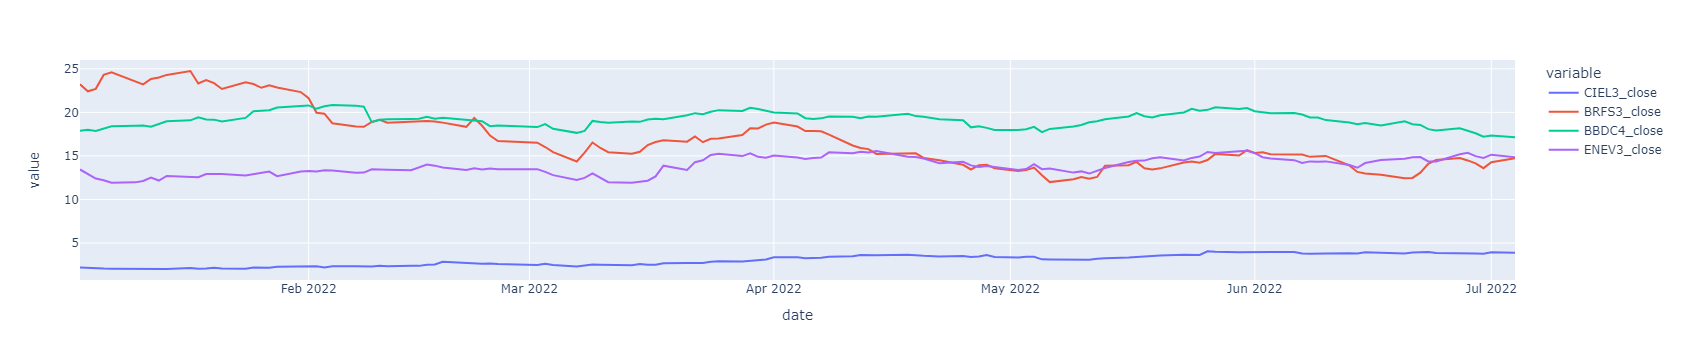

In [382]:
fig = px.line(final_df, x='date', y=[column for column in final_df.columns if "close" in column and "ibov" not in column])
fig.show()

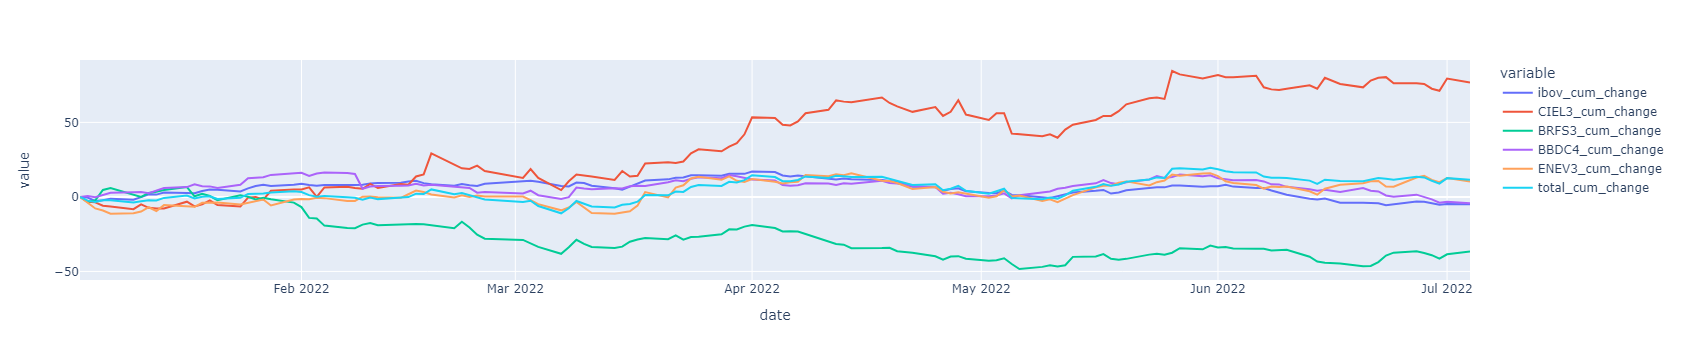

In [383]:
fig = px.line(final_df, x='date', y=[column for column in final_df.columns if "change" in column])
fig.show()